In [1]:
from openbb_terminal.sdk import openbb

import vectorbt as vbt
import numpy as np

In [8]:
price = openbb.stocks.load("NVDA")["Close"]

buy_hold_base = vbt.Portfolio.from_holding(
    close = price,
    init_cash = 10_000
)

buy_hold_base.total_profit()

Loading Daily data for NVDA with starting period 2020-11-09.

25547.56478149187

In [9]:
slow_ma = vbt.MA.run(price, window = 20)
fast_ma = vbt.MA.run(price, window = 5)

exits = fast_ma.ma_crossed_below(slow_ma)
entries = fast_ma.ma_crossed_above(slow_ma)

strategy = vbt.Portfolio.from_signals(
    close = price,
    entries = entries,
    exits = exits,
    init_cash = 10_000,
    fees = 0.001
)

strategy.total_profit()

17261.06177434509

In [10]:
strategy.stats()

Start                         2020-11-09 00:00:00
End                           2023-11-10 00:00:00
Period                                        757
Start Value                               10000.0
End Value                            27261.061774
Total Return [%]                       172.610618
Benchmark Return [%]                   255.475648
Max Gross Exposure [%]                      100.0
Total Fees Paid                        591.267784
Max Drawdown [%]                         46.92847
Max Drawdown Duration                       309.0
Total Trades                                   22
Total Closed Trades                            21
Total Open Trades                               1
Open Trade PnL                        1431.578606
Win Rate [%]                            42.857143
Best Trade [%]                          63.303631
Worst Trade [%]                        -16.353071
Avg Winning Trade [%]                   23.765385
Avg Losing Trade [%]                    -6.431425


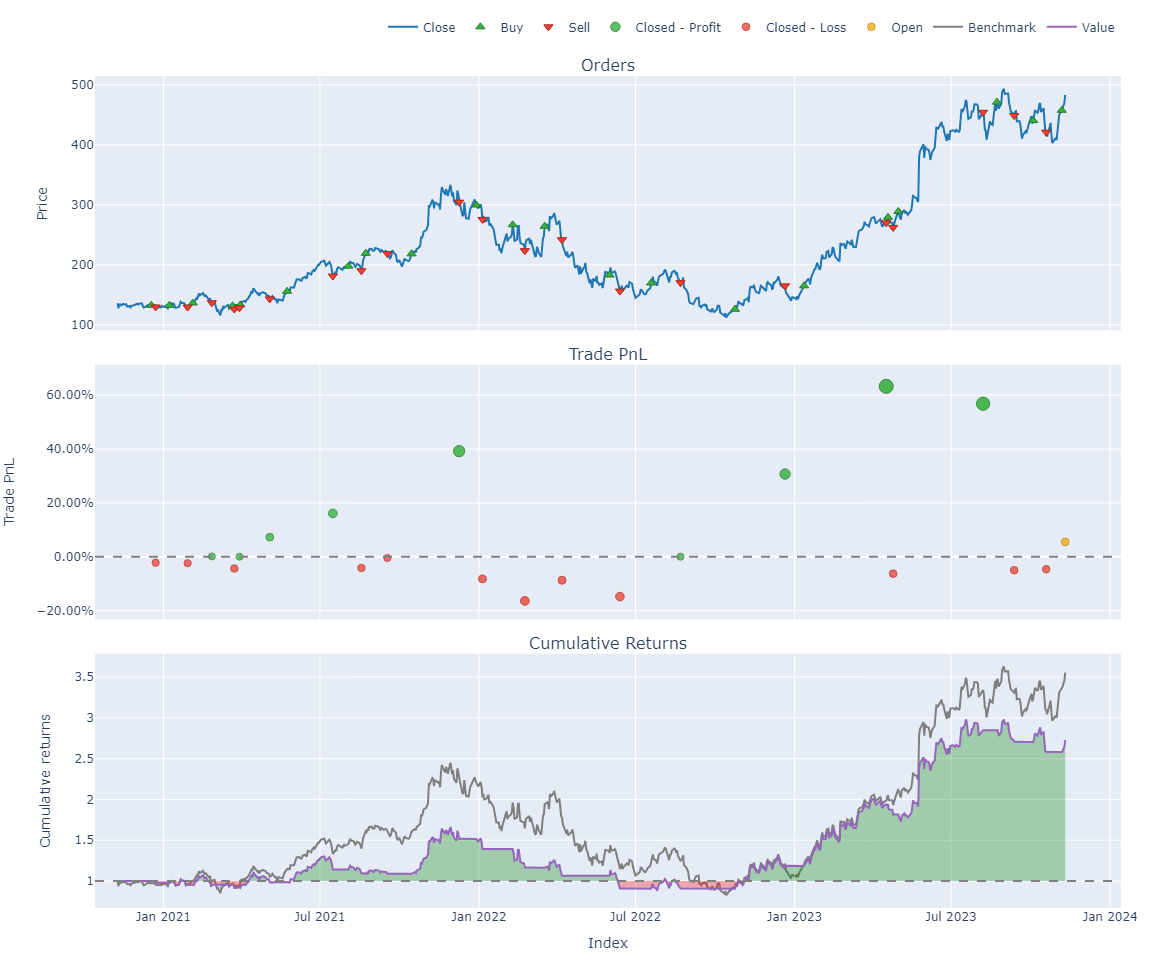

In [11]:
strategy.plot().show()